In [1]:
import omicverse as ov
import scanpy as sc


   ____            _     _    __                  
  / __ \____ ___  (_)___| |  / /__  _____________ 
 / / / / __ `__ \/ / ___/ | / / _ \/ ___/ ___/ _ \ 
/ /_/ / / / / / / / /__ | |/ /  __/ /  (__  )  __/ 
\____/_/ /_/ /_/_/\___/ |___/\___/_/  /____/\___/                                              

Version: 1.5.8, Tutorials: https://omicverse.readthedocs.io/


In [2]:
adata = sc.read("layered_myeloid_BP2_unintegrated_annotated.h5ad")
adata

AnnData object with n_obs × n_vars = 357095 × 1887
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'GEM', 'unintegrated_clusters', 'seurat_clusters', 'prog', 'disease', 'sex', 'pair', 'age', 'edss', 'disease.state', 'prog_sex', 'disease_sex', 'disease.state_sex', 'celltypes.disease', 'celltypes.prog', 'celltypes.disease.state', 'celltype', 'ident', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'Disease_CellType'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    uns: 'X_name'
    obsm: 'pca', 'umap'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced'

In [3]:
# Define the disease states you want to include
disease_states_to_include = ['HC', 'RRMS']  # Replace with your specific disease states

# Subset the AnnData object based on the disease state metadata
subset_adata = adata[adata.obs['disease.state'].isin(disease_states_to_include)]

In [4]:
del adata

In [5]:
subset_adata.obs["disease.state"]

GEM1_AAACCCAAGACCGCCT-1    HC
GEM1_AAACCCAAGAGTGGCT-1    HC
GEM1_AAACCCAAGTATCCTG-1    HC
GEM1_AAACCCAAGTGAGGTC-1    HC
GEM1_AAACCCACAACGCATT-1    HC
                           ..
GEM9_TTTGTTGTCCATAGGT-1    HC
GEM9_TTTGTTGTCGCCGATG-1    HC
GEM9_TTTGTTGTCGTAACCA-1    HC
GEM9_TTTGTTGTCTCCGAAA-1    HC
GEM9_TTTGTTGTCTGGGCGT-1    HC
Name: disease.state, Length: 168221, dtype: category
Categories (2, object): ['HC', 'RRMS']

In [5]:
adata = sc.read("maybeprocessed_layered_myeloid_BP2_unintegrated_annotated.h5ad")
adata

AnnData object with n_obs × n_vars = 357095 × 1887
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'GEM', 'unintegrated_clusters', 'seurat_clusters', 'prog', 'disease', 'sex', 'pair', 'age', 'edss', 'disease.state', 'prog_sex', 'disease_sex', 'disease.state_sex', 'celltypes.disease', 'celltypes.prog', 'celltypes.disease.state', 'celltype', 'ident', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'Disease_CellType', 'nUMIs', 'mito_perc', 'detected_genes', 'cell_complexity'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'mt'
    uns: 'X_name', 'neighbors', 'scaled|original|cum_sum_eigenvalues', 'scaled|original|pca_var_ratios'
    obsm: 'pca', 'scaled|original|X_pca', 'umap'
    varm: 'scaled|original|pca_loadings'
    layers: 'ambiguous', 'lognorm', 'matrix', 'scaled', 'spliced', 'unspliced'
    obsp: 'connectivities', 'distances'

In [6]:
adata.obs["disease"]

GEM1_AAACCCAAGACCGCCT-1    HC
GEM1_AAACCCAAGAGTGGCT-1    HC
GEM1_AAACCCAAGTATCCTG-1    HC
GEM1_AAACCCAAGTGAGGTC-1    HC
GEM1_AAACCCACAACGCATT-1    HC
                           ..
GEM9_TTTGTTGTCCATAGGT-1    HC
GEM9_TTTGTTGTCGCCGATG-1    HC
GEM9_TTTGTTGTCGTAACCA-1    HC
GEM9_TTTGTTGTCTCCGAAA-1    HC
GEM9_TTTGTTGTCTGGGCGT-1    HC
Name: disease, Length: 357095, dtype: category
Categories (2, object): ['HC', 'MS']

In [3]:
#quantity control
adata=ov.pp.qc(adata,
              tresh={'mito_perc': 0.05, 'nUMIs': 500, 'detected_genes': 250})
#normalize and high variable genes (HVGs) calculated
adata=ov.pp.preprocess(adata,mode='shiftlog|pearson',n_HVGs=2000, n_jobs = 18)

Calculate QC metrics
End calculation of QC metrics.
Original cell number: 357095
Begin of post doublets removal and QC plot
Running Scrublet
filtered out 4 genes that are detected in less than 3 cells
normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:05)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
normalizing counts per cell
    finished (0:00:00)
normalizing counts per cell
    finished (0:00:00)
Embedding transcriptomes using PCA...


KeyboardInterrupt: 

In [7]:
#scale the adata.X
ov.pp.scale(subset_adata)

#Dimensionality Reduction
ov.pp.pca(subset_adata,layer='scaled',n_pcs=50)

In [15]:
test_adata=adata[adata.obs['disease'].isin(['HC','MS'])]
test_adata

View of AnnData object with n_obs × n_vars = 357095 × 1887
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'GEM', 'unintegrated_clusters', 'seurat_clusters', 'prog', 'disease', 'sex', 'pair', 'age', 'edss', 'disease.state', 'prog_sex', 'disease_sex', 'disease.state_sex', 'celltypes.disease', 'celltypes.prog', 'celltypes.disease.state', 'celltype', 'ident', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'Disease_CellType'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    uns: 'X_name', 'scaled|original|pca_var_ratios', 'scaled|original|cum_sum_eigenvalues'
    obsm: 'pca', 'umap', 'scaled|original|X_pca'
    varm: 'scaled|original|pca_loadings'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced', 'scaled', 'lognorm'

In [16]:
dds=ov.bulk.pyDEG(test_adata.to_df(layer='lognorm').T)

In [17]:
dds.drop_duplicates_index()
print('... drop_duplicates_index success')

... drop_duplicates_index success


In [18]:
treatment_groups=test_adata.obs[test_adata.obs['disease']=='MS'].index.tolist()
control_groups=test_adata.obs[test_adata.obs['disease']=='HC'].index.tolist()
result=dds.deg_analysis(treatment_groups,control_groups,method='ttest')

In [19]:
result.sort_values('qvalue').head()

,pvalue,qvalue,FoldChange,-log(pvalue),-log(qvalue),BaseMean,log2(BaseMean),log2FC,abs(log2FC),size,sig
MIR181A1HG,0.0,0.0,1.214040,inf,inf,0.560306,-0.835713,0.279815,0.279815,0.121404,sig
HES4,0.0,0.0,0.488608,inf,inf,0.143120,-2.804707,-1.033251,1.033251,0.048861,sig
ABCA1,0.0,0.0,1.426164,inf,inf,0.461269,-1.116321,0.512140,0.512140,0.142616,sig
HIF1A,0.0,0.0,1.274513,inf,inf,1.311169,0.390854,0.349946,0.349946,0.127451,sig
IGKC,0.0,0.0,1.941165,inf,inf,0.068164,-3.874854,0.956923,0.956923,0.194117,sig


In [20]:
# -1 means automatically calculates
dds.foldchange_set(fc_threshold=-1,
                   pval_threshold=0.05,
                   logp_max=10)

... Fold change threshold: 1.1874637439159668


In [49]:
!pip install sanbomics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 9.0 MB/s eta 0:00:009.9 MB/s eta 0:00:01


In [50]:
from sanbomics.plots import volcano

In [47]:
dds

In [57]:
genes = result.index

In [60]:
result["gene"] = genes

In [61]:
result

,pvalue,qvalue,FoldChange,-log(pvalue),-log(qvalue),BaseMean,log2(BaseMean),log2FC,abs(log2FC),size,sig,gene
CCL4,3.807271e-145,2.163952e-144,2.782602,144.419386,10.000000,0.025011,-5.321277,1.476435,1.476435,0.278260,up,CCL4
CXCL10,3.910438e-03,5.308630e-03,0.866064,2.407775,2.275018,0.010089,-6.631124,-0.207455,0.207455,0.086606,normal,CXCL10
CXCL9,5.908658e-01,6.281486e-01,0.943418,0.228511,0.201938,0.002433,-8.682854,-0.084030,0.084030,0.094342,normal,CXCL9
LYPD2,1.814649e-165,1.119034e-164,0.639202,164.741207,10.000000,0.108781,-3.200498,-0.645656,0.645656,0.063920,normal,LYPD2
CCL4L2,2.178245e-117,1.073198e-116,3.380876,116.661893,10.000000,0.013459,-6.215259,1.757397,1.757397,0.338088,up,CCL4L2
...,...,...,...,...,...,...,...,...,...,...,...,...
PRKCG,3.268605e-11,5.818733e-11,1.172221,10.485638,10.000000,0.025049,-5.319090,0.229244,0.229244,0.117222,normal,PRKCG
PNPT1,9.477335e-15,1.802796e-14,0.935847,14.023314,10.000000,0.171654,-2.542422,-0.095656,0.095656,0.093585,normal,PNPT1
MIR3142HG,1.120191e-56,3.476644e-56,0.656391,55.950708,10.000000,0.016537,-5.918178,-0.607372,0.607372,0.065639,normal,MIR3142HG
LINC00276,4.884093e-01,5.299760e-01,1.066697,0.311216,0.275744,0.001446,-9.433857,0.093150,0.093150,0.106670,normal,LINC00276


0s encountered for p value, imputing 1e-323
impute your own value if you want to avoid this


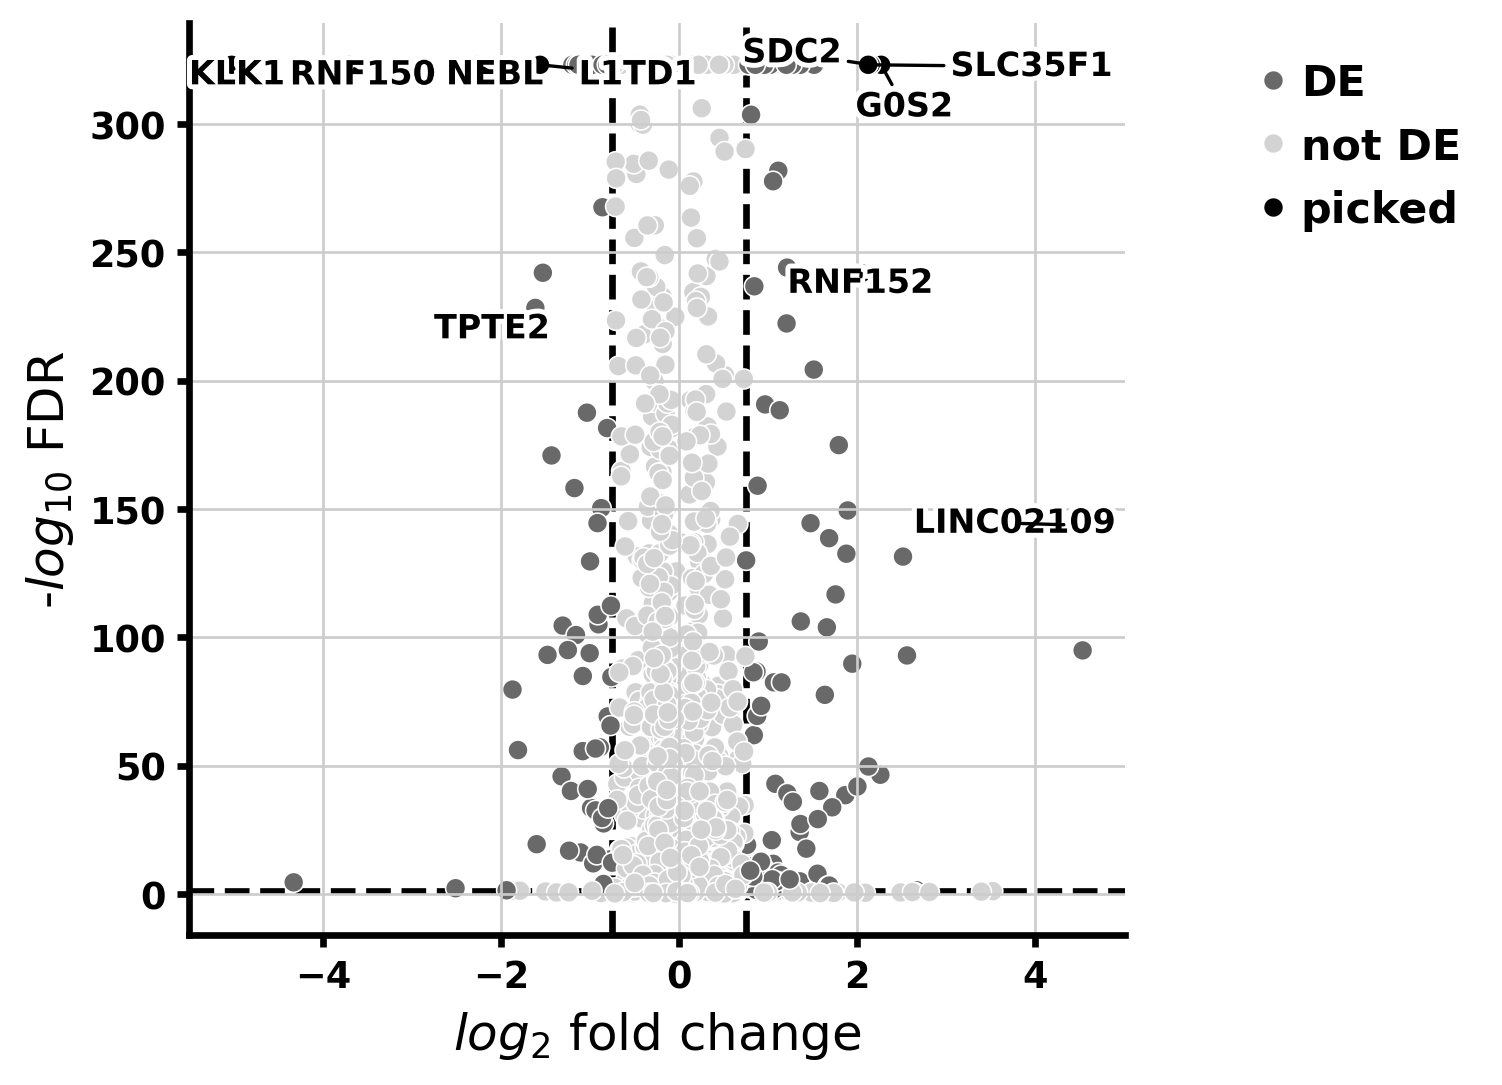

In [62]:
volcano(result, pvalue = "pvalue", log2fc = "log2FC", symbol = "gene")

In [36]:
adata.var_names

Index(['CCL4', 'CXCL10', 'CXCL9', 'LYPD2', 'CCL4L2', 'EREG', 'C1QB', 'CXCL11',
       'FCER1A', 'HLA-DQA1',
       ...
       'PDE6D', 'CEP290', 'PLXNA2', 'LINC02128', 'HERC6', 'PRKCG', 'PNPT1',
       'MIR3142HG', 'LINC00276', 'EIF2B3'],
      dtype='object', length=1887)

In [40]:
# Remove a gene by its name
gene_to_remove = "GEM"  # Replace "GeneName" with the name of the gene you want to remove
if gene_to_remove in adata.var_names:
    adata = adata[:, ~adata.var_names.isin([gene_to_remove])]
else:
    print("Gene not found in adata.var_names.")

In [41]:
ax = sc.pl.heatmap(
    adata,
    result.index,
    groupby="celltype",
    layer="scaled",
    vmin=-2,
    vmax=2,
    cmap="RdBu_r",
    dendrogram=True,
    swap_axes=True,
    figsize=(11, 4),
)



KeyboardInterrupt: 

<AxesSubplot: title={'center': 'DEG Analysis'}, xlabel='$log_{2}FC$', ylabel='$-log_{10}(qvalue)$'>

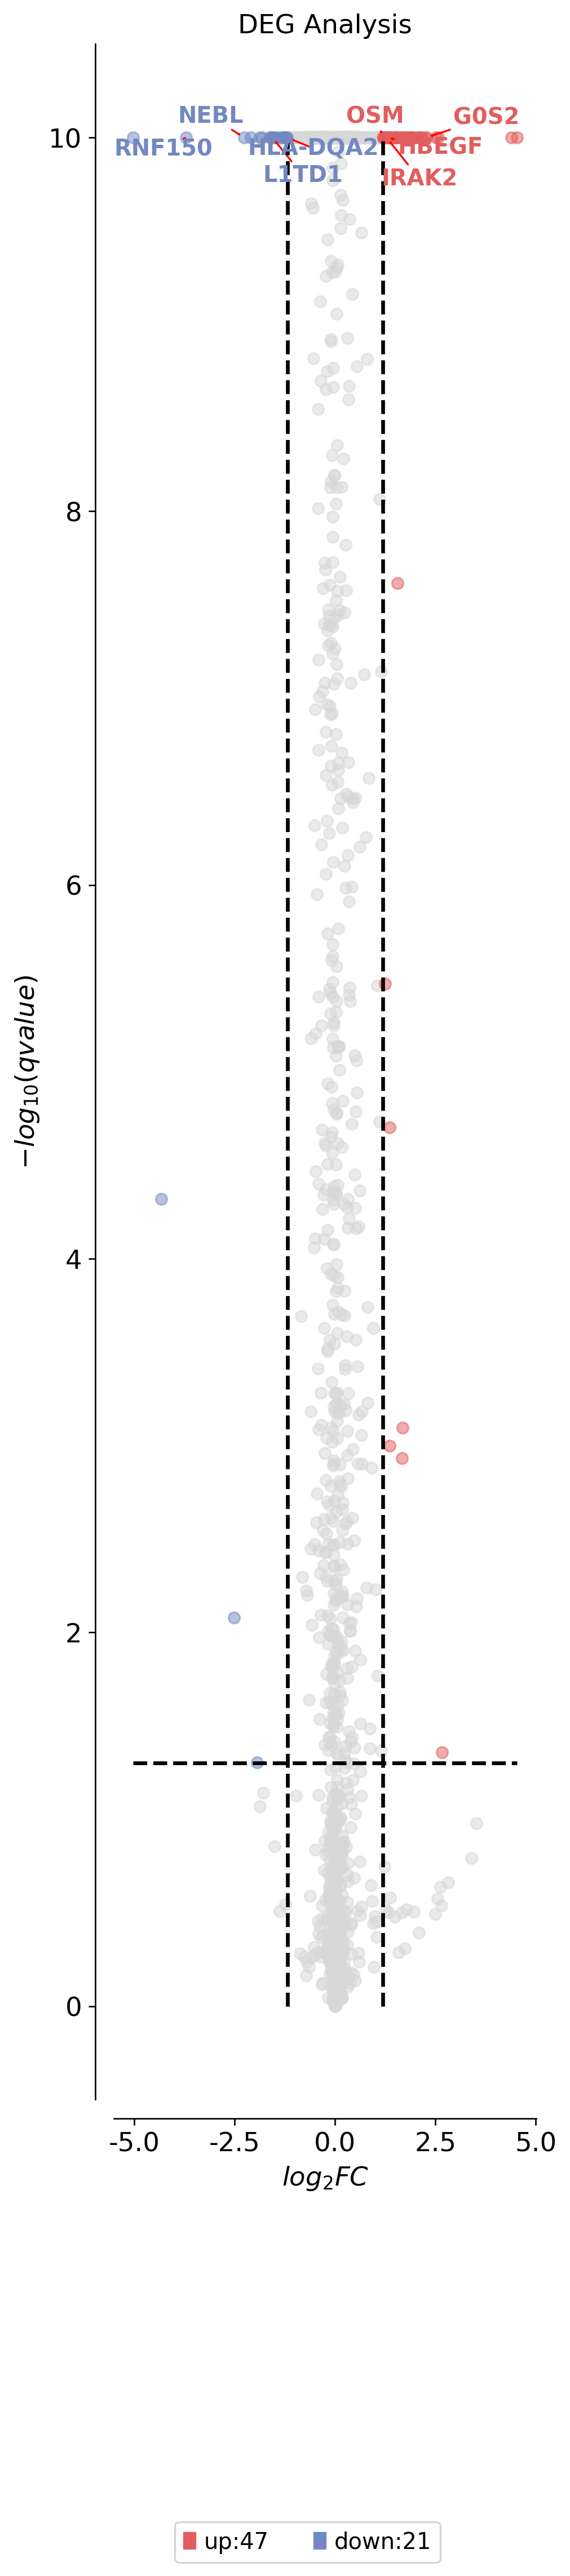

In [24]:
dds.plot_volcano(title='DEG Analysis',figsize=(4,20),
                 plot_genes_num=8,plot_genes_fontsize=12,)

In [22]:
adata.write("processed_layered_myeloid_BP2_unintegrated_annotated.h5ad")

In [35]:
# Define the fraction of cells you want to subsample (e.g., 0.5 for 50%)
fraction_to_subsample = 0.5

# Randomly subsample the AnnData object
subset_adata = subset_adata[subset_adata.obs.sample(frac=fraction_to_subsample).index]

In [36]:
subset_adata

View of AnnData object with n_obs × n_vars = 10514 × 1887
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'GEM', 'unintegrated_clusters', 'seurat_clusters', 'prog', 'disease', 'sex', 'pair', 'age', 'edss', 'disease.state', 'prog_sex', 'disease_sex', 'disease.state_sex', 'celltypes.disease', 'celltypes.prog', 'celltypes.disease.state', 'celltype', 'ident', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'Disease_CellType'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    uns: 'X_name', 'scaled|original|pca_var_ratios', 'scaled|original|cum_sum_eigenvalues', 'neighbors'
    obsm: 'pca', 'umap', 'scaled|original|X_pca'
    varm: 'scaled|original|pca_loadings'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced', 'scaled', 'lognorm'
    obsp: 'distances', 'connectivities'

In [37]:
meta_obj=ov.single.MetaCell(subset_adata,use_rep='scaled|original|X_pca',n_metacells=150,
                           use_gpu=False)

Welcome to SEACells!


In [38]:
meta_obj.initialize_archetypes()

Computing kNN graph using scanpy NN ...
Computing radius for adaptive bandwidth kernel...


  0%|          | 0/10514 [00:00<?, ?it/s]

Making graph symmetric...
Parameter graph_construction = union being used to build KNN graph...
Computing RBF kernel...


  0%|          | 0/10514 [00:00<?, ?it/s]

Building similarity LIL matrix...


  0%|          | 0/10514 [00:00<?, ?it/s]

Constructing CSR matrix...
Building kernel on scaled|original|X_pca
Computing diffusion components from scaled|original|X_pca for waypoint initialization ... 
Done.
Sampling waypoints ...
Done.
Selecting 139 cells from waypoint initialization.
Initializing residual matrix using greedy column selection
Initializing f and g...


100%|██████████████████████████████████████████| 21/21 [00:00<00:00, 113.27it/s]

Selecting 11 cells from greedy initialization.


In [39]:
meta_obj.train(min_iter=10, max_iter=50)

Randomly initialized A matrix.
Setting convergence threshold at 0.18762
Starting iteration 1.
Completed iteration 1.
Converged after 8 iterations.
Converged after 9 iterations.
Starting iteration 10.
Completed iteration 10.
Converged after 10 iterations.


In [40]:
meta_obj.save('model.pkl')

In [41]:
meta_obj.load('model.pkl')

In [43]:
ad=meta_obj.predicted(method='soft',celltype_label='disease')

KeyError: 'raw'

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(4,4))
ov.utils.embedding(
    meta_obj.adata,
    basis="X_umap",
    color=['disease'],
    frameon='small',
    title="Meta cells",
    #legend_loc='on data',
    legend_fontsize=14,
    legend_fontoutline=2,
    size=10,
    ax=ax,
    alpha=0.2,
    #legend_loc='', 
    add_outline=False, 
    #add_outline=True,
    outline_color='black',
    outline_width=1,
    show=False,
    #palette=ov.utils.blue_color[:],
    #legend_fontweight='normal'
)
ov.single._metacell.plot_metacells(ax,meta_obj.adata,color='#CB3E35',
                  n_jobs                )

In [ ]:
test_adata=adata[adata.obs['disease'].isin(['HC','MS'])]
test_adata

In [ ]:
dds_meta=ov.bulk.pyDEG(test_adata.to_df().T)

In [ ]:
dds_meta.drop_duplicates_index()
print('... drop_duplicates_index success')

In [ ]:
treatment_groups=test_adata.obs[test_adata.obs['disease']=='MS'].index.tolist()
control_groups=test_adata.obs[test_adata.obs['disease']=='HC'].index.tolist()
result=dds_meta.deg_analysis(treatment_groups,control_groups,method='ttest')

In [ ]:
result.sort_values('qvalue').head()

In [ ]:
# -1 means automatically calculates
dds_meta.foldchange_set(fc_threshold=-1,
                   pval_threshold=0.05,
                   logp_max=10)

In [ ]:
dds_meta.plot_volcano(title='DEG Analysis',figsize=(4,4),
                 plot_genes_num=8,plot_genes_fontsize=12,)n_jobs